# Decision Tree - Rain or not ?
### **Use weather feature :** 
1. Humidity3pm: 0 - 100
2. RainToday: 0 or 1
3. RainFall: 0 - 30
4. WindSpeed: 10 - 100
5. Humidity9am: 0 - 100

### **Following is my rule to generate dataset:**
1.  Humidity3pm < 71 & RainToday is 0 => Not Rain
2.  Humidity3pm < 71 & RainToday is 1 & RainFall < 3 => Not Rain
3.  Humidity3pm < 71 & RainToday is 1 & RainFall >= 3 & WindSpeed < 70 => Not Rain
4.  Humidity3pm < 71 & RainToday is 1 & RainFall >= 3 & WindSpeed >= 70 => Rain
5.  Humidity3pm >= 71 & RainToday is 1 => Rain
6.  Humidity3pm >= 71 & RainToday is 0 & RainFall >= 1.5 => Rain
7.  Humidity3pm >= 71 & RainToday is 0 & RainFall < 1.5 & WindSpeed < 45 & Humidity9am < 65 => Not Rain
8.  Humidity3pm >= 71 & RainToday is 0 & RainFall < 1.5 & WindSpeed < 45 & Humidity9am >= 65 => Rain
9.  Humidity3pm >= 71 & RainToday is 0 & RainFall < 1.5 & WindSpeed >= 45 & Humidity9am < 50 => Not Rain
10. Humidity3pm >= 71 & RainToday is 0 & RainFall < 1.5 & WindSpeed >= 45 & Humidity9am >= 50 => Rain

### **Org Diagram:**
![Imgur](https://i.imgur.com/PWFY7jU.png)

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

## A function to generate data 

In [31]:
def generate_data(h3_lb, h3_ub, rt, rf_lb, rf_ub, sp_lb, sp_ub, h9_lb, h9_ub, num, rain):
    sp_min = 10.0
    sp_max = 100.0
    
    h_min = 0.0
    h_max = 100.0
    
    rf_min = 0.0
    rf_max = 30.0
    
    humidity3pm = [h3_lb + np.random.rand() * (h3_ub - h3_lb) if h3_lb != -1 else h_min + np.random.rand() * (h_max - h_min) for i in range(num)]
    rainfall = [rf_lb + np.random.rand() * (rf_ub - rf_lb) if rf_lb != -1 else rf_min + np.random.rand() * (rf_max - rf_min) for i in range(num)]
    raintoday = [1 if rt == 1 else 0 for i in range(num)]
    speed = [sp_lb + np.random.rand() * (sp_ub - sp_lb) if sp_lb != -1 else sp_min + np.random.rand() * (sp_max - sp_min) for i in range(num)]
    humidity9am = [h9_lb + np.random.rand() * (h9_ub - h9_lb) if h9_lb != -1 else h_min + np.random.rand() * (h_max - h_min) for i in range(num)]
    raintomorrow = [1 if rain == 1 else 0 for i in range(num)]
    
    df = pd.DataFrame(dict(humidity3pm = humidity3pm, raintoday = raintoday, rainfall = rainfall, windspeed = speed, humidity9am = humidity9am, raintomorrow = raintomorrow))
    
    return df

## Use 10 rules to generate data

In [32]:
num = 50
df1 = generate_data(0, 71, 0, -1, -1, -1, -1, -1, -1, num, 0)
df2 = generate_data(0, 71, 1, 0, 3, -1, -1, -1, -1, num, 0)
df3 = generate_data(0, 71, 1, 3, 30, 10, 70, -1, -1, num, 0)
df4 = generate_data(0, 71, 1, 3, 30, 70, 100, -1, -1, num, 1)

df5 = generate_data(71, 100, 1, -1, -1, -1, -1, -1, -1, num, 1)
df6 = generate_data(71, 100, 0, 1.5, 30, -1, -1, -1, -1, num, 1)
df7 = generate_data(71, 100, 0, 0, 1.5, 10, 45, 0, 65, num, 0)
df8 = generate_data(71, 100, 0, 0, 1.5, 10, 45, 65, 100, num, 1)
df9 = generate_data(71, 100, 0, 0, 1.5, 45, 100, 0, 50, num, 0)
df10 = generate_data(71, 100, 0, 0, 1.5, 45, 100, 50, 100, num, 1)

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis = 0, ignore_index = True)
df.to_csv('generated_data.csv', index = False)

df.sample(10)

,humidity3pm,raintoday,rainfall,windspeed,humidity9am,raintomorrow
232,92.861085,1,28.525380,87.914476,83.301803,1
444,74.132922,0,0.985066,87.070995,42.626553,0
374,83.083605,0,1.207634,41.560157,81.819219,1
450,76.482728,0,0.573566,56.337000,92.506953,1
57,38.615156,1,0.509240,74.745604,24.458742,0
37,32.497775,0,28.949021,62.244363,44.304189,0
485,91.008166,0,0.292481,85.450513,99.582675,1
285,71.781015,0,9.383042,27.241016,69.388453,1
370,72.381165,0,0.363520,34.527118,73.669848,1
393,81.757905,0,0.658826,10.868610,80.277078,1


## Use SkiLearn Decision Tree tool train model

Accuracy : 0.976


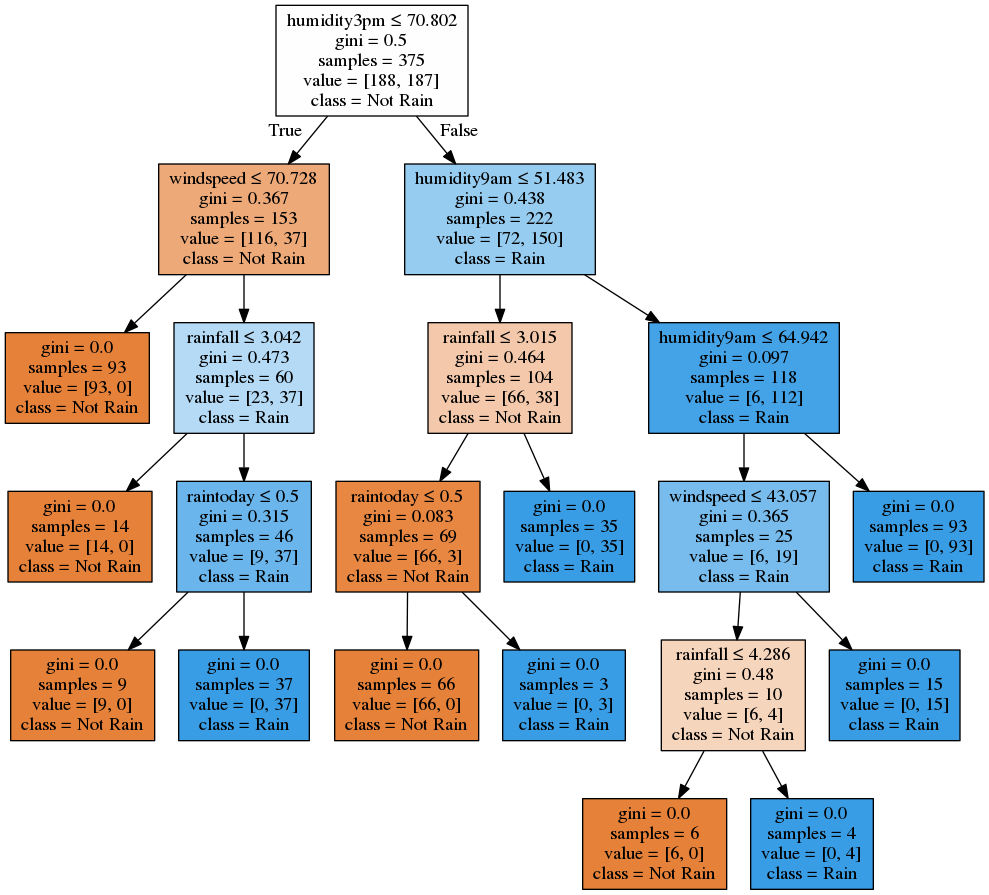

In [33]:
X = df[['humidity3pm', 'raintoday', 'rainfall', 'windspeed', 'humidity9am']]
Y = df[['raintomorrow']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
clf_dt = DecisionTreeClassifier(random_state = 0, max_depth=None)
clf_dt.fit(X_train, Y_train)
Y_pred = clf_dt.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print('Accuracy :',score)

#Plot
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data, feature_names=X.columns, class_names=['Not Rain', 'Rain'],  filled=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  